In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [40]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? (4б)** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [41]:
X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()
X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_centered)
data_pca = pd.DataFrame(pca.transform(X_centered), columns=["PCA_1", "PCA_2"])

In [44]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

In [45]:
df = pd.concat([data_pca, y], axis=1)

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению (2б)**


In [47]:
data_pca.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [48]:
X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1


In [49]:
### Your code is here
corr_pca_1 = X.corrwith(data_pca['PCA_1'], axis = 0)
corr_pca_2 = X.corrwith(data_pca['PCA_2'], axis = 0)
corr_pca = pd.concat([corr_pca_1, corr_pca_2], axis=1).rename(columns={0: "PCA_1", 1: "PCA_2"})

<AxesSubplot:>

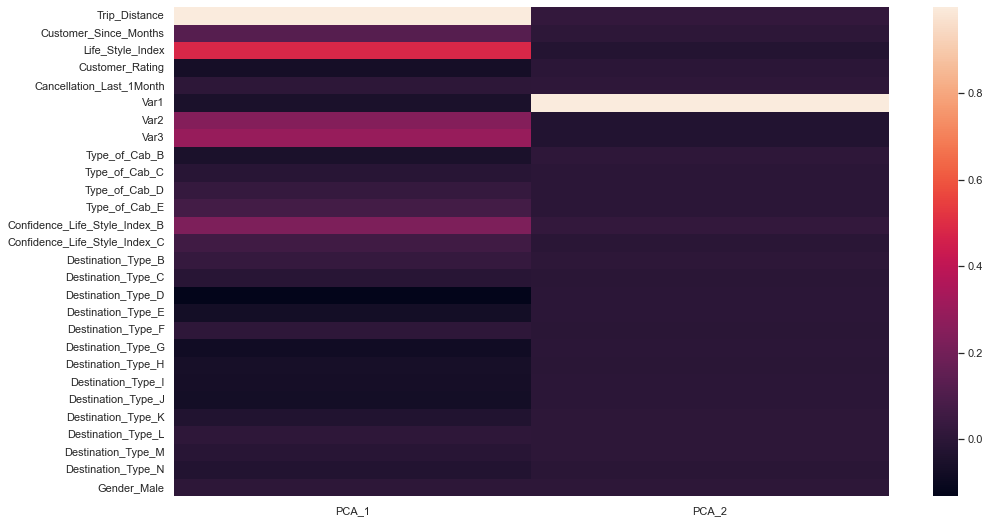

In [50]:
sns.heatmap(corr_pca)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой? (2б)**

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

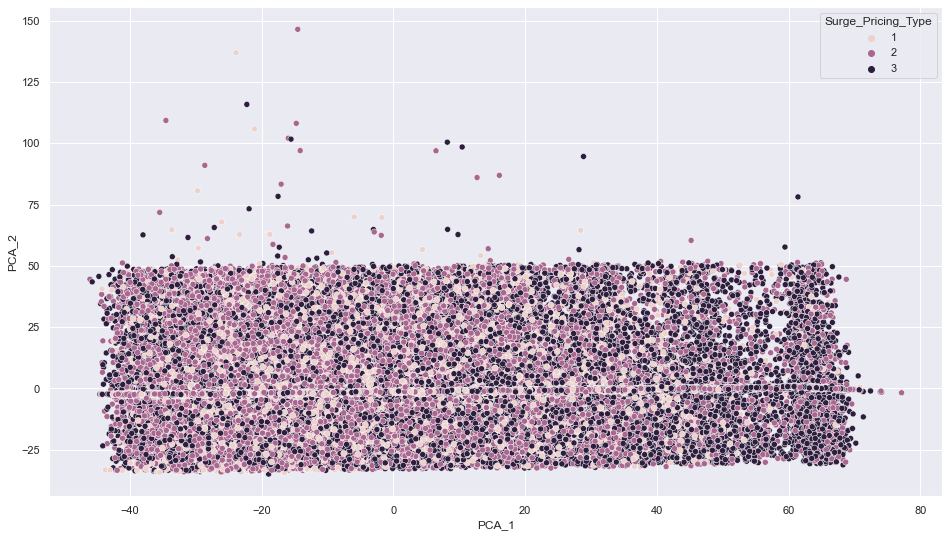

In [46]:
sns.set(rc={'figure.figsize':(16, 9)})

sns.scatterplot(data=df, x="PCA_1", y="PCA_2", hue="Surge_Pricing_Type")

In [60]:
pca_col_3 = PCA(n_components=3)
pca_col_3.fit(X_centered)
data_pca = pd.DataFrame(pca_col_3.transform(X_centered), columns=["PCA_1", "PCA_2", "PCA_3"])
df_col_3 = pd.concat([data_pca, y], axis=1)

<AxesSubplot:>

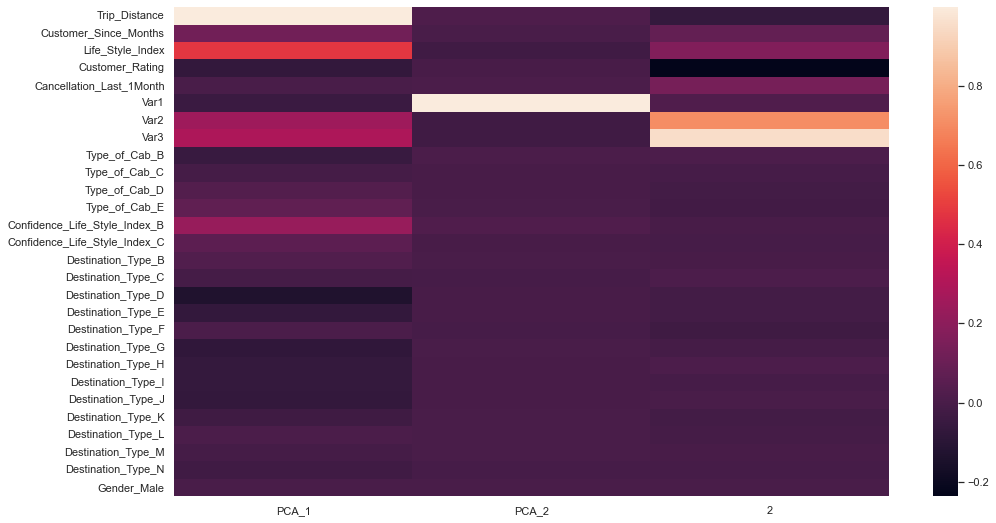

In [63]:
sns.heatmap(corr_pca)

In [62]:
### Your code is here
corr_pca_1 = X.corrwith(df_col_3['PCA_1'], axis = 0)
corr_pca_2 = X.corrwith(df_col_3['PCA_2'], axis = 0)
corr_pca_3 = X.corrwith(df_col_3['PCA_3'], axis = 0)
corr_pca = pd.concat([corr_pca_1, corr_pca_2, corr_pca_3], axis=1).rename(columns={0: "PCA_1", 1: "PCA_2"})

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

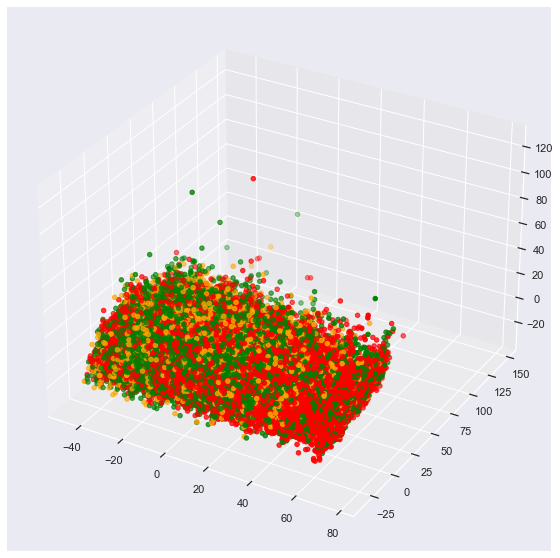

In [58]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = df_col_3['Surge_Pricing_Type'].replace([1, 2, 3],
                                            ['orange', 'green', 'red'])

ax.scatter3D(df_col_3['PCA_1'], 
             df_col_3['PCA_2'],
             df_col_3['PCA_3'], 
             c=colors)

In [110]:
df_col_3['PCA_2'].corr(df_col_3['PCA_3'])

4.4938423287156026e-17

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях (2б)**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [79]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [83]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}


pipe = Pipeline([('scaler', StandardScaler()), 
                 ('PCA', PCA(n_components=2)), 
                 ('model', LogisticRegression())])

grid_search = GridSearchCV(pipe, param_grid)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score ACC: {grid_search.best_score_}")
print(classification_report(grid_search.predict(X_test), y_test, digits=3))

Best parameters: {'model__C': 0.0001, 'model__penalty': 'l2'}
Best score ACC: 0.4805419374268192
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         0
           2      0.691     0.478     0.565     16403
           3      0.509     0.492     0.500      9930

    accuracy                          0.483     26333
   macro avg      0.400     0.323     0.355     26333
weighted avg      0.622     0.483     0.541     26333



In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [85]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())])

grid_search = GridSearchCV(pipe, param_grid)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score ACC: {grid_search.best_score_}")
print(classification_report(grid_search.predict(X_test), y_test, digits=3))

Best parameters: {'model__C': 0.001, 'model__penalty': 'l2'}
Best score ACC: 0.6803919317784358
              precision    recall  f1-score   support

           1      0.532     0.746     0.621      3830
           2      0.830     0.636     0.720     14808
           3      0.589     0.736     0.655      7695

    accuracy                          0.681     26333
   macro avg      0.650     0.706     0.665     26333
weighted avg      0.716     0.681     0.687     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую (2б)**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [86]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [89]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1_score = train_pca_i(n_components, X_train, y_train)
    accuracy_dict.update({n_components: accuracy})
    f1_score_dict.update({n_components: f1_score})

CPU times: total: 3min 19s
Wall time: 1min 14s


In [108]:
f1_score_dict

{2: 0.42692871189872517,
 4: 0.4732597327190699,
 8: 0.5214966955878036,
 16: 0.5272660036490832,
 28: 0.6760757307801638}

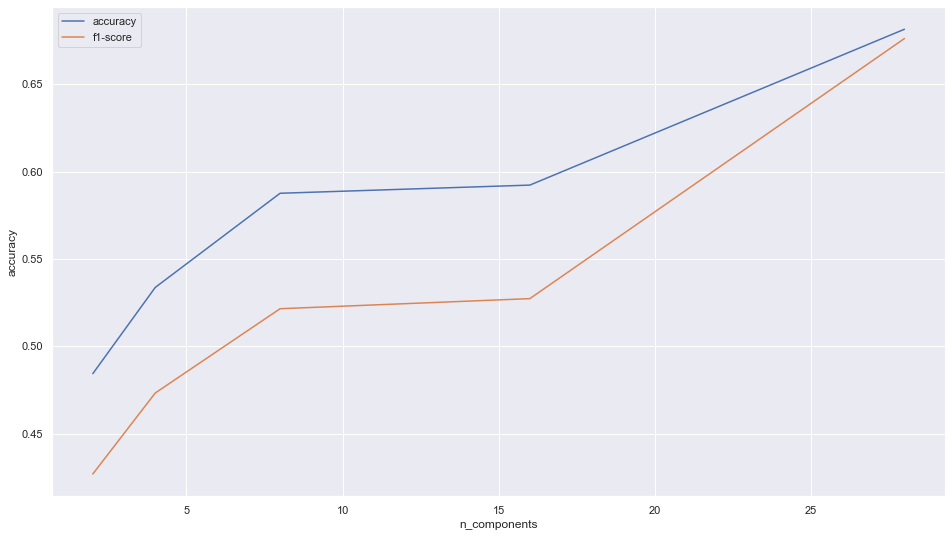

In [107]:
fig, ax = plt.subplots()
ax.plot(accuracy_dict.keys(), accuracy_dict.values(), label='accuracy')
ax.plot(f1_score_dict.keys(), f1_score_dict.values(), label='f1-score')

ax.set(xlabel='n_components', ylabel='accuracy')
ax.legend()
plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [128]:
X_short = X.iloc[0:50000]
y_short = y.iloc[0:50000]
X_short

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16.68,10.0,2.71554,1.48625,0,61.0,53,67,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,23.38,5.0,3.00193,3.87625,1,50.0,46,71,0,1,...,0,0,0,0,0,0,0,0,0,1
49997,23.40,2.0,2.57121,1.07125,1,38.0,58,74,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,15.49,10.0,3.00627,3.96375,0,37.0,45,80,1,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_short)

X_tsne

array([[ 73.730835 , -18.106276 ],
       [  5.1353464, -66.11759  ],
       [-58.619473 , -28.034706 ],
       ...,
       [ 56.256687 , -41.327927 ],
       [ 52.932056 , -28.900969 ],
       [-20.445976 , -35.08495  ]], dtype=float32)

In [130]:
X_tsne = np.concatenate((X_tsne, y_short.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

<AxesSubplot:xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

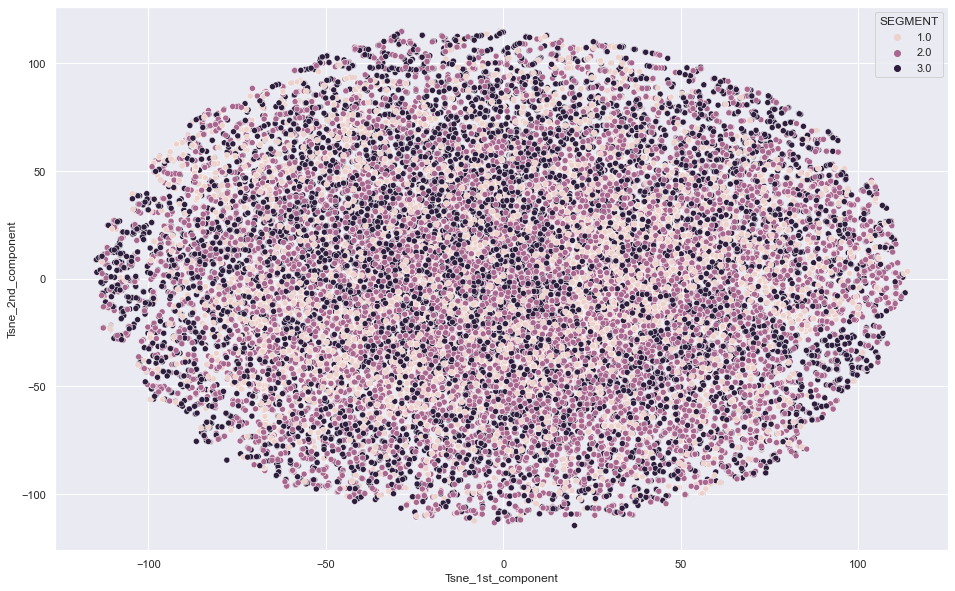

In [131]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [132]:
### Произведем T-SNE преобразование 3D

from sklearn.manifold import TSNE

X_tsne_3d = TSNE(n_components=3).fit_transform(X)

X_tsne_3d

array([[ 23.411312  ,   2.218804  ,  -0.42294025],
       [  3.1203887 ,  15.2463455 ,  17.498499  ],
       [ -4.9950633 ,  -8.207052  ,   8.71125   ],
       ...,
       [ -5.760063  , -13.597576  ,   0.19087425],
       [  8.673105  ,   1.9521141 ,  10.178357  ],
       [  6.491006  ,   1.2026973 , -21.476088  ]], dtype=float32)

In [134]:
### Преобразуем в pd.DataFrame

X_tsne_3d = np.concatenate((X_tsne_3d, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['Tsne_1st_component',
                                             'Tsne_2nd_component',
                                             'Tsne_3rd_component',
                                             'SEGMENT'])

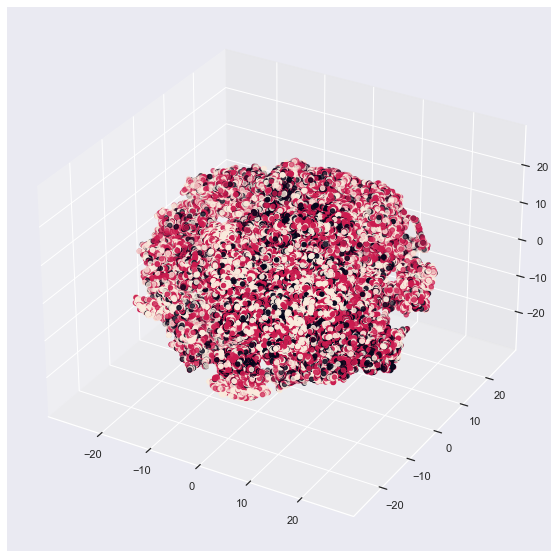

In [135]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                      ['orange', 'green', 'red', 'blue'])

ax.scatter3D(X_tsne_3d['Tsne_1st_component'], 
             X_tsne_3d['Tsne_2nd_component'],
             X_tsne_3d['Tsne_3rd_component'], 
             c=colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!